<a href="https://colab.research.google.com/github/wenyi22/python-deep-learning/blob/main/%E9%80%A2%E7%94%B2%E5%A4%A7%E5%AD%B8%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92%E7%AC%AC%E4%B8%89%E5%A0%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SVM支持向量機

In [ ]:
from sklearn import datasets
from sklearn import svm  #演算法
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
iris = datasets.load_iris()
X = iris.data #特徵
target = iris.target # 已知分類

In [ ]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
targetName = iris.target_names
targetName

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
labels = targetName[target] #依target 進行轉換
labels

array(['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'versicolo

In [ ]:
setosa_petal_length = X[labels=='setosa',2]
setosa_petal_width = X[labels=='setosa',3]
versicolor_petal_length = X[labels=='versicolor',2]
versicolor_petal_width = X[labels=='versicolor',3]
virginica_petal_length = X[labels=='virginica',2]
virginica_petal_width = X[labels=='virginica',3]


In [ ]:
setosa_petal_length

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4,
       1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1. , 1.7, 1.9, 1.6,
       1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3,
       1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4])

In [ ]:
#np.c_  Array資料合併
setosa = np.c_[setosa_petal_length,setosa_petal_width]
versicolor = np.c_[versicolor_petal_length,versicolor_petal_width]
virginica = np.c_[virginica_petal_length,virginica_petal_width]

In [ ]:
setosa

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2]])

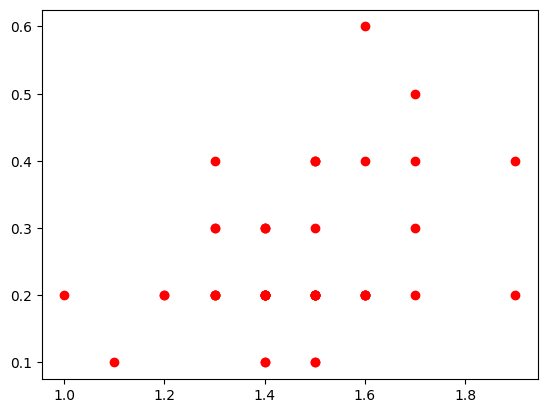

In [ ]:
plt.scatter(setosa[:,0],setosa[:,1],color='red')

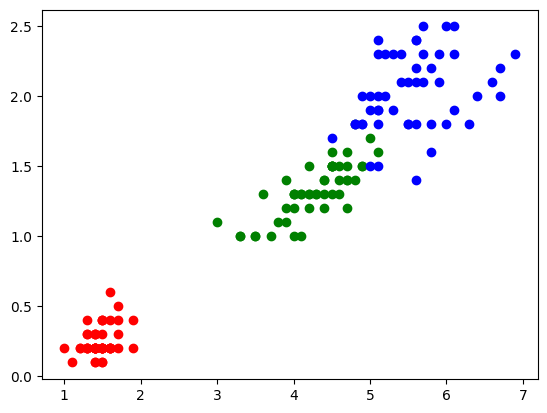

In [ ]:
plt.scatter(setosa[:,0],setosa[:,1],color='red')
plt.scatter(versicolor[:,0],versicolor[:,1],color='green')
plt.scatter(virginica[:,0],virginica[:,1],color='blue')

In [ ]:
# np.r_ 將Array資料垂直合併
training_data = np.r_[setosa,versicolor,virginica]
training_data

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [ ]:
training_labels = np.r_[np.zeros(len(setosa)),np.ones(len(versicolor)),np.ones(len(virginica))*2]
training_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [ ]:
#np.zeros 產生0
#np.ones 產生 1
zero = np.zeros(10)
one = np.ones
print(zero)
print(one)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
<function ones at 0x7f97bbe2bc70>


In [ ]:
lsvc = svm.LinearSVC()
lsvc.fit(training_data,training_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [ ]:
training_x_min = training_data[:,0].min() - 1
training_x_max = training_data[:,0].max() + 1
training_y_min = training_data[:,1].min() - 1
training_y_max = training_data[:,1].max() +1

plt.contour 等高線圖

cmap顏色 ==> plt.cm.bone 黑、白 x 線

alpha => 透明度

plt.autoscale() ->設定座標自動縮放

plt.grid() ->畫格線


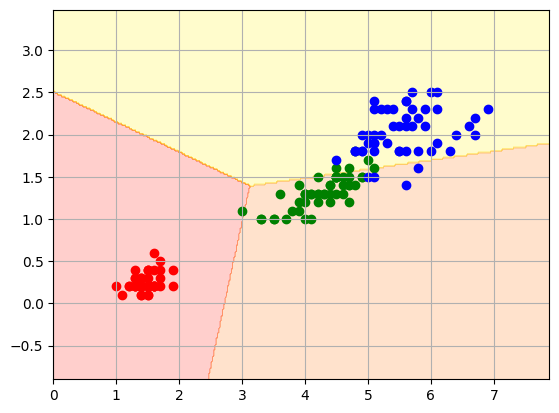

In [ ]:
grid_interval = 0.02
xx,yy = np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
Z = lsvc.predict(np.c_[xx.ravel(),yy.ravel()]) # ravel() ->numpy 多維度轉變為一維
Z = Z.reshape(xx.shape)
# plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
plt.contourf(xx,yy,Z,cmap=plt.cm.autumn,alpha=0.2)
# plt.contourf 等高線圖(顏色會填滿) full
# plt.contour 純劃等高線
plt.autoscale()
plt.grid()

plt.scatter(setosa[:,0],setosa[:,1],color='red')
plt.scatter(versicolor[:,0],versicolor[:,1],color='green')
plt.scatter(virginica[:,0],virginica[:,1],color='blue')

In [ ]:
print(training_x_min)
print(training_x_max)
print(training_y_min)
print(training_y_max)
#原始資料
print()
print(training_data[:,0].min())
print(training_data[:,0].max())
print("等差數列")
ar = np.arange(training_x_min,training_x_max,0.02)
print(ar)
print()

print("長度:",len(xx))
print()
print(xx)
print('-'*30)
print(yy)
print('-'*30)
print(xx.ravel())
print(yy.ravel())

print()
print()
print("xx大小:",xx.shape)
print("yy大小:",yy.shape)
print("Z大小:",Z.shape)

0.0
7.9
-0.9
3.5

1.0
6.9
等差數列
[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06 1.08 1.1
 1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26 1.28 1.3  1.32 1.34 1.36 1.38
 1.4  1.42 1.44 1.46 1.48 1.5  1.52 1.54 1.56 1.58 1.6  1.62 1.64 1.66
 1.68 1.7  1.72 1.74 1.76 1.78 1.8  1.82 1.84 1.86 1.88 1.9  1.92 1.94
 1.96 1.98 2.   2.02 2.04 2.06 2.08 2.1  2.12 2.14 2.16 2.18 2.2  2.22
 2.24 2.26 2.28 2.3  2.32 2.34 2.36 2.38 2.4  2.42 2.44 2.46 2.48 2.5
 2.52 2.54 2.56 2.58 2.6  2.62 2.64 2.66 2.68 2.7  2.72 2.74 2.76 2.78
 2.8  2.82 2.84 2.86 2.88 2.9  2.92 2.94 2.96 2.98 3.   3.02 3.04 3.06
 3.08 3.1  3.12 3.14 3.16 3.18 3.2  3.22 3.24 3.26 3.28 3.3  3.32 3.34
 3.36 3.38 3.4  3.42 3.44 3.46 3.48 3.5  3.52 3.54 3.56 3.58 3.6  3.62
 3.64 3.66 3.68 3.7  3.72 3.74 3.76 3.78 3.8  3.

In [ ]:
grid_interval = 0.02
xx,yy = np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
Z = lsvc.predict(np.c_[xx.ravel(),yy.ravel()])
print(Z)
Z = Z.reshape(xx.shape)
print(Z)

[0. 0. 0. ... 2. 2. 2.]
[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]]


#等高線及其他函式說明


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
m = 5
n = 3
x = np.linspace(0,1,m) #取出 m 個數量，介於0~1之間，有包含0 和1
y = np.linspace(0,1,n)
print(x)
print(y)

[0.   0.25 0.5  0.75 1.  ]
[0.  0.5 1. ]


In [ ]:
X,Y = np.meshgrid(x,y) # 利用二個Array 製作網格
print(X)
print(Y)

[[0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]
 [0.   0.25 0.5  0.75 1.  ]]
[[0.  0.  0.  0.  0. ]
 [0.5 0.5 0.5 0.5 0.5]
 [1.  1.  1.  1.  1. ]]


In [ ]:
X.shape

(3, 5)

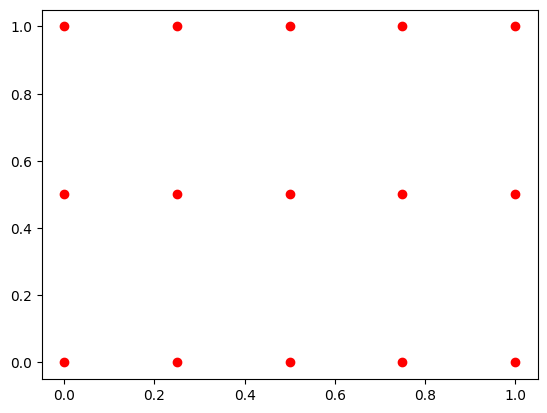

In [ ]:
plt.plot(X,Y,marker='o',color='red',linestyle='none')

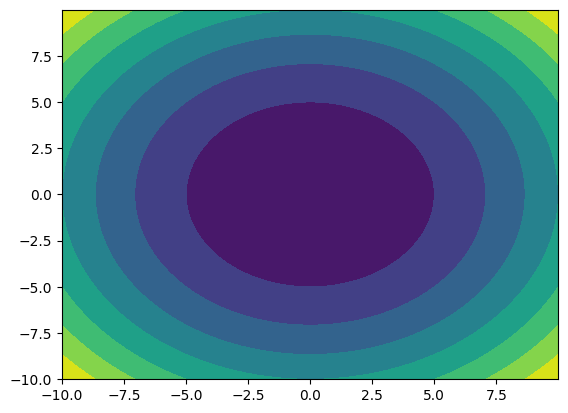

In [ ]:
#畫等高線
step = 0.01
x = np.arange(-10,10,step)
y = np.arange(-10,10,step)
X,Y = np.meshgrid(x,y)
Z = X**2+Y**2
plt.contourf(X,Y,Z)

顏色越深，表示值越小，當Z=0時，顏色則為黑色

plt.contourf 的參數為:X，Y，Z

X -> X軸的網格

Y -> Y軸的網格

Z -> 網格上點的值(高度)

<ipython-input-30-372dd46e00fa>:7: UserWarning: The following kwargs were not used by contour: 'color'
  contour = plt.contour(X,Y,Z,[20,40],color='K')


<a list of 2 text.Text objects>

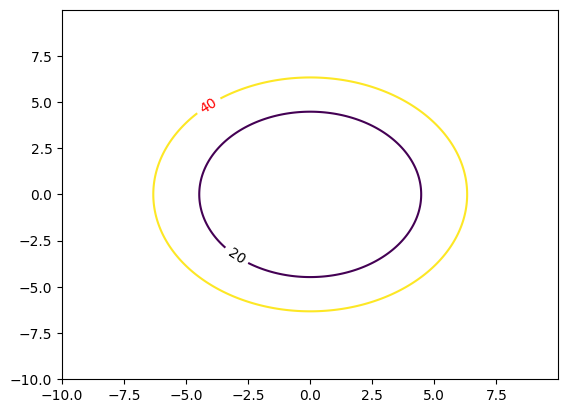

In [ ]:
#畫等高線
step = 0.01
x = np.arange(-10,10,step)
y = np.arange(-10,10,step)
X,Y = np.meshgrid(x,y)
Z = X**2+Y**2
contour = plt.contour(X,Y,Z,[20,40],color='K')
plt.clabel(contour,colors=('k','r'))

In [ ]:
# 自訂SVM_PLT
def SVM_plt(clf,name):
  training_x_min = training_data[:,0].min() - 1
  training_x_max = training_data[:,0].max() + 1
  training_y_min = training_data[:,1].min() - 1
  training_y_max = training_data[:,1].max() +1
  grid_interval = 0.02
  xx,yy = np.meshgrid(np.arange(training_x_min,training_x_max,grid_interval),np.arange(training_y_min,training_y_max,grid_interval))
  Z = lsvc.predict(np.c_[xx.ravel(),yy.ravel()]) # ravel() ->numpy 多維度轉變為一維
  Z = Z.reshape(xx.shape)
  # plt.contourf(xx,yy,Z,cmap=plt.cm.bone,alpha=0.2)
  plt.contourf(xx,yy,Z,cmap=plt.cm.autumn,alpha=0.2)
  # plt.contourf 等高線圖(顏色會填滿) full
  # plt.contour 純劃等高線
  plt.autoscale()
  plt.grid()

  plt.scatter(setosa[:,0],setosa[:,1],color='red')
  plt.scatter(versicolor[:,0],versicolor[:,1],color='green')
  plt.scatter(virginica[:,0],virginica[:,1],color='blue')

  plt.title(name) # 避免亂碼，請使用英文名稱

SVC 分類器如下

LinearSVC(線性)

kernel = 'linbear' (線性)

kernel = 'poly' (非線性)

kernel = 'rbf' (非線性)

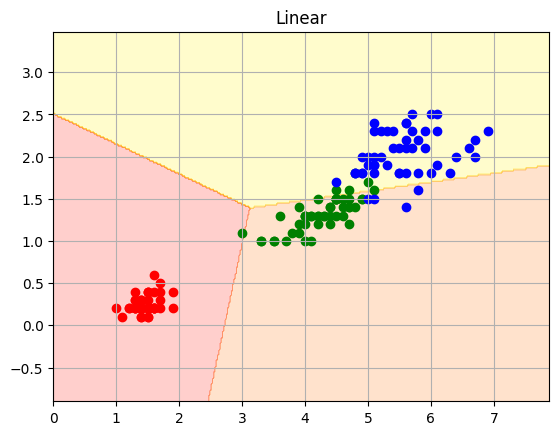

In [ ]:
clf = svm.SVC(kernel='linear')
clf.fit(training_data,training_labels)
SVM_plt(clf,'Linear')

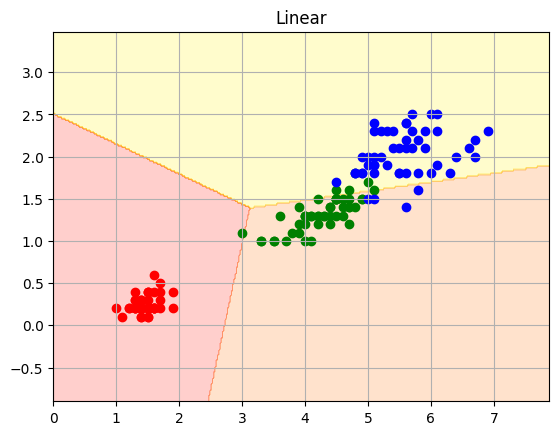

In [ ]:
clf = svm.SVC(kernel='poly')
clf.fit(training_data,training_labels)
SVM_plt(clf,'Linear')

svm.SVC => C

C =>懲罰係數，C越大表示容忍錯誤的程度越低，越精準；但要留意overfitting的問題

gamma => 決定支援向量多寡，預測入肚(scale,auto)。

若gamma的值用數值來設定式，數值越大越能處理複雜的分類邊界(會影響到勳訓練速度)

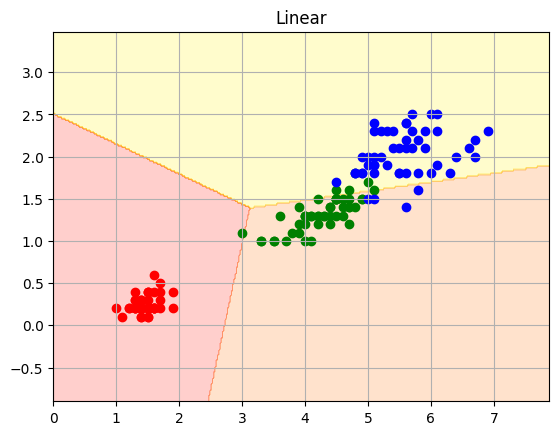

In [ ]:
clf = svm.SVC(kernel='poly')
svm.SVC()
clf.fit(training_data,training_labels)
SVM_plt(clf,'Linear')

In [ ]:
#請同學將training_data 改為 花萼的資料來看 非線性的圖出來是甚麼

#建模流程

In [ ]:
#建立以處理的資歷
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [ ]:
# 隨機分割要訓練和測試的資料集
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
#訓練模組
clf = svm.SVC(kernel='poly',C=1000)
clf.fit(X_train,y_train)

SVC(C=1000, kernel='poly')

In [ ]:
clf.predict(X_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 1, 2,
       1])

In [ ]:
#看結果(分數)
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.9904761904761905
0.9555555555555556


In [ ]:
#存模組
import joblib
joblib.dump(clf,'/content/drive/MyDrive/DL_FCU/clfsvm.pkl')

['/content/drive/MyDrive/DL_FCU/clfsvm.pkl']

In [ ]:
myclf = joblib.load('/content/drive/MyDrive/DL_FCU/clfsvm.pkl')

In [ ]:
myclf.score(X_test,y_test)

0.9555555555555556

# 迴歸模型

線性迴歸 y(X) = w0 + w1x

多項式迴歸 y(x) = w0+w1x+w2x(平方)+...+wnx(n平方)

多元迴歸

在線性中的線 ->藥用最小平方法求出，求兩個類別距離最近者

Y = a +b * X + e

a => y軸的截距

b => 迴歸斜率

e => 誤差

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
temperatures = np.array([29,38,34,31,25,29,32,21,24,33,25,31,26,30]) #溫度
tea = np.array([77,62,93,84,59,62,80,75,58,91,51,72,65,84]) #紅茶銷售量

In [ ]:
lr = LinearRegression()
lr.fit(np.reshape(temperatures,(len(temperatures),1)),np.reshape(tea,(len(tea),1)))

LinearRegression()

In [ ]:
temp = np.reshape(temperatures,(len(temperatures),1)) #14組，放一個值
temp

array([[29],
       [38],
       [34],
       [31],
       [25],
       [29],
       [32],
       [21],
       [24],
       [33],
       [25],
       [31],
       [26],
       [30]])

In [ ]:
temp = np.reshape(temperatures,(7,2)) # 7組，放兩個值
temp

array([[29, 38],
       [34, 31],
       [25, 29],
       [32, 21],
       [24, 33],
       [25, 31],
       [26, 30]])

In [ ]:
newTemp = np.array([30])
sales = lr.predict(np.reshape(newTemp,(len(newTemp),1)))
sales

array([[73.47987288]])

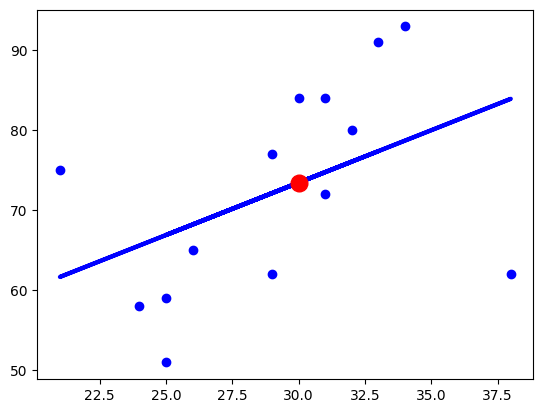

In [ ]:
plt.scatter(temperatures,tea,color='blue')
plt.plot(temperatures,lr.predict(np.reshape(temperatures,(len(temperatures),1))),color='b',linewidth=3)
plt.plot(newTemp,sales,color='r',marker='o',markersize=12)

In [ ]:
score = lr.score(np.reshape(temperatures,(len(temperatures),1)),np.reshape(tea,(len(tea),1)))
score

0.2064737381856403

#台積電股票分析(線姓迴歸)

In [ ]:
import os
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/MyDrive/DL_FCU/TSMC'
os.chdir(path)
file_list = os.listdir()
file_list.sort()
file_list

['STOCK_DAY_2330_202207.csv',
 'STOCK_DAY_2330_202208.csv',
 'STOCK_DAY_2330_202209.csv',
 'STOCK_DAY_2330_202210.csv',
 'STOCK_DAY_2330_202211.csv',
 'STOCK_DAY_2330_202212.csv',
 'STOCK_DAY_2330_202301.csv',
 'STOCK_DAY_2330_202302.csv',
 'STOCK_DAY_2330_202303.csv',
 'STOCK_DAY_2330_202304.csv',
 'STOCK_DAY_2330_202305.csv',
 'STOCK_DAY_2330_202306.csv',
 'STOCK_DAY_2330_202307.csv']

In [ ]:
df = open(path+"/"+file_list[0])
data = df.readline()
print(data)
data = pd.read_csv(df)
data = data.drop(['日期'],axis=1)
data = data.dropna() #刪除缺失值
data

﻿111年07月 2330 台積電           各日成交資訊,,,,,,,,



,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,"72,597,018","33,459,624,760",471.5,474.0,452.5,453.5,-22.5,"172,267"
1,"61,206,245","27,225,872,277",443.0,451.5,440.0,440.0,-13.5,"96,760"
2,"55,469,884","24,538,415,224",449.5,451.5,433.0,446.0,6.0,"70,715"
3,"42,156,925","18,556,660,847",442.0,447.5,435.0,435.5,-10.5,"59,018"
4,"50,984,110","22,992,311,966",442.0,459.0,438.5,457.5,22.0,"56,227"
5,"39,134,398","18,251,251,558",470.0,470.5,461.5,467.0,9.5,"46,039"
6,"22,930,675","10,673,806,551",468.0,470.5,461.0,462.0,-5.0,"25,631"
7,"24,155,935","10,932,798,847",458.0,458.0,449.5,449.5,-12.5,"34,431"
8,"48,134,139","22,639,696,871",470.5,473.0,466.0,470.5,21.0,"48,964"
9,"34,014,188","16,045,789,881",466.0,477.5,463.0,475.0,4.5,"36,454"


In [ ]:
for i in range(13):
  df = open(path+"/"+file_list[i])
  data = df.readline() #讀取一行，以方便 pd 呈現
  data = pd.read_csv(df)
  data = data.drop(['日期', 'Unnamed: 9'], axis=1)
  data = data.dropna() #刪除缺失值

KeyError: ignored